## Visualizing a text dataset

In [1]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("../input/nlp-getting-started/train.csv")
test_df = pd.read_csv("../input/nlp-getting-started/test.csv")
sample_df = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [3]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [5]:
# Let's visualize some random training examples
import random
random_index = random.randint(0,len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
    _,text,target = row
    print(f"Target: {target}","(real disaster)" if target>0 else "(Not real disaster)")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: 1 (real disaster)
Text:
Check out 'Malaysia Confirms Plane Wreckage Is From Flight MH370' at  http://t.co/UB3woZ2UT1

---

Target: 1 (real disaster)
Text:
How to Survive a Dust Storm http://t.co/0yL3yT4YLH

---

Target: 0 (Not real disaster)
Text:
Fatality ????

---

Target: 0 (Not real disaster)
Text:
Catching up on GBBO and omg that girls cake that just totally collapsed I feel so bad

---

Target: 1 (real disaster)
Text:
Feel like I've got no control of anything that goes on in my life at the minute. #whirlwind #drained

---



## Split data into training and validation sets

In [6]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences , val_sentences , train_labels , val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                              train_df_shuffled['target'].to_numpy(),
                                                                              test_size=0.1,random_state=42)

In [7]:
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

## Converting text into numbers

In NLP, there are two main concepts for turning text into numbers:

**Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
1. Using word-level tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
1. Character-level tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
1. Sub-word tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.

**Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. 
There are two ways to use embeddings:
1. Create your own embedding - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
1. Reuse a pre-learned embedding - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

## Text vectorization (tokenization)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                   standardize="lower_and_strip_punctuation",
                                   split="whitespace", # how to split tokens
                                   ngrams=None, # create groups of n-words?
                                   output_mode="int", # how to map tokens to numbers
                                   output_sequence_length=None) # how long should the output sequence of tokens be?
                                   # pad_to_max_tokens=True) # Not valid if using max_tokens=None

2022-04-07 08:38:39.336750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 08:38:39.425652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 08:38:39.426326: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 08:38:39.427480: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [10]:
# Setup text vectorization with custom variables
max_vocab_length = 20000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [11]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

2022-04-07 08:38:42.132922: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [12]:
# Create sample sentence and tokenize it
sample_sentence="There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [13]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Watching a man electrocuted on the roof of #mumbailocals is definitely a lesson.. People please learn!! #lessonforlife #marinelines #mumbai      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  636,     3,    89,   461,    11,     2,  1773,     6, 10607,
            9,  3943,     3,  5229,    57,   170]])>

In [14]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 20000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['attending', 'attendees', 'attended', 'attend', 'attempted']


## Creating an Embedding using an Embedding Layer


In [15]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set input shape
                            output_dim = 128,  # set size of embedding vector
                            embeddings_initializer = "uniform", # default, intialize randomly
                            input_length = max_length, # how long is each input
                            name="embedding_1")
embedding

In [16]:
# Get a random sentence from training set
random_sentence=random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\n Embedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 'If you are going to achieve excellence in big things you develop the habit in little matters....' dont know the author      

 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01648287, -0.01244445, -0.00593115, ..., -0.01819796,
         -0.04376183,  0.04817954],
        [-0.00123378,  0.00323629, -0.0277025 , ..., -0.01858177,
         -0.04566612,  0.04470313],
        [ 0.03210879,  0.01650668,  0.01403118, ...,  0.01477012,
          0.03275109,  0.00308426],
        ...,
        [ 0.02504804,  0.02770906,  0.01542609, ..., -0.04612003,
         -0.02924401, -0.00331711],
        [-0.03709953,  0.04833485,  0.01080109, ...,  0.04519942,
         -0.01164054, -0.02208861],
        [-0.04364428,  0.02437404, -0.03696011, ..., -0.04763393,
          0.02931459,  0.0068561 ]]], dtype=float32)>

In [17]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01648287, -0.01244445, -0.00593115,  0.02571679, -0.01758653,
        0.04785769,  0.01713232,  0.02104768,  0.01665342,  0.03555442,
       -0.02099076,  0.01388302,  0.04033318,  0.00459173,  0.03044039,
       -0.02730775, -0.03163983,  0.04615699, -0.03585492,  0.02836765,
       -0.04096633, -0.02900456,  0.04499844,  0.00440123,  0.0203773 ,
       -0.02728077,  0.04871868, -0.020643  , -0.03030854,  0.01946949,
        0.02708319, -0.00055827,  0.01366253,  0.0393349 , -0.03918117,
       -0.02166616,  0.0099115 ,  0.04434251, -0.04946912,  0.03149461,
       -0.03924376,  0.02310855,  0.04422278, -0.00049195, -0.02702255,
       -0.02866596,  0.02727517, -0.01256846,  0.00137087, -0.02770535,
       -0.03686273,  0.02514655,  0.04851106,  0.03109604, -0.00540564,
       -0.03000927, -0.03803948, -0.02728719, -0.00131368, -0.04499172,
        0.00955989,  0.04845902, -0.02594701, -0.01595932, -0.03329698,
       -0.012385

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor

## Model 0: Getting a baseline

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf",MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [19]:
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [20]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

## Creating an evaluation function for our model experiments

* Accuracy
* Precision
* Recall
* F1-score

In [21]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
    """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted la_bels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
    
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true,y_pred)*100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
    model_results = {"accuracy": model_accuracy,
                    "precision": model_precision,
                    "recall": model_recall,
                    "f1-score": model_f1}
    
    return model_results

In [22]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

## Model 1: A simple dense model

In [23]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = layers.Dense(1,activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense") # construct the model

In [24]:
# Compile model
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [25]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           2560000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,560,129
Trainable params: 2,560,129
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 2s 5ms/step - loss: 0.6091 - accuracy: 0.7016 - val_loss: 0.5347 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4273 - accuracy: 0.8305 - val_loss: 0.4826 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3121 - accuracy: 0.8803 - val_loss: 0.4636 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2334 - accuracy: 0.9181 - val_loss: 0.4714 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.1751 - accuracy: 0.9437 - val_loss: 0.4925 - val_accuracy: 0.7900


In [27]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7900


[0.49245190620422363, 0.7900262475013733]

In [28]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(20000, 128)


In [29]:
# Make predictions
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

array([[0.58255404],
       [0.75262535],
       [0.9977703 ],
       [0.08345769],
       [0.10107742],
       [0.9533619 ],
       [0.9089836 ],
       [0.99329597],
       [0.985924  ],
       [0.30061743]], dtype=float32)

In [30]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [31]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,y_pred=model_1_preds)
model_1_results

{'accuracy': 79.00262467191601,
 'precision': 0.7904026816892662,
 'recall': 0.7900262467191601,
 'f1-score': 0.788967977944356}

In [32]:
def compare_baseline_to_new_results(baseline_results,new_model_results):
    for key , value in baseline_results.items():
        print(f"Baseline {key}: {value:.2f} , New {key}: {new_model_results[key]:.2f} , Difference: {new_model_results[key]-value:.2f}")
        
compare_baseline_to_new_results(baseline_results,model_1_results)        

Baseline accuracy: 79.27 , New accuracy: 79.00 , Difference: -0.26
Baseline precision: 0.81 , New precision: 0.79 , Difference: -0.02
Baseline recall: 0.79 , New recall: 0.79 , Difference: -0.00
Baseline f1-score: 0.79 , New f1-score: 0.79 , Difference: 0.00


## Recurrent Neural Networks (RNN's)

The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

Recurrent neural networks can be used for a number of sequence-based problems:

* One to one: one input, one output, such as image classification.
* One to many: one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
* Many to one: many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
* Many to many: many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).

## Model 2: LSTM

In [33]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)

from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                    output_dim=128,
                                    embeddings_initializer="uniform",
                                    input_length=max_length,
                                    name="embedding_2")
# Create LSTM model
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.LSTM(256,return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(64)(x) # return vector for whole sequence
outputs = layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [34]:
# Compile model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [35]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 15, 128)           2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 256)           394240    
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 128)           197120    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [36]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5


2022-04-07 08:39:01.591484: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


215/215 [==============================] - 7s 12ms/step - loss: 0.5050 - accuracy: 0.7583 - val_loss: 0.4676 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2750 - accuracy: 0.8943 - val_loss: 0.5573 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1452 - accuracy: 0.9508 - val_loss: 0.6431 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0832 - accuracy: 0.9731 - val_loss: 0.7604 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0541 - accuracy: 0.9819 - val_loss: 1.0209 - val_accuracy: 0.7572


In [37]:
model_2.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.0209 - accuracy: 0.7572


[1.0209256410598755, 0.7572178244590759]

In [38]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.4377882e-03],
       [6.6207629e-01],
       [9.9790359e-01],
       [1.8765158e-03],
       [6.7232532e-04],
       [9.9975091e-01],
       [4.1793635e-01],
       [9.9976557e-01],
       [9.9971765e-01],
       [2.2563171e-03]], dtype=float32)

In [39]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [40]:
# Calculate model_2 metrics
model_2_results = calculate_results(y_true=val_labels,y_pred=model_2_preds)
model_2_results

{'accuracy': 75.7217847769029,
 'precision': 0.7573294948869645,
 'recall': 0.7572178477690289,
 'f1-score': 0.7558283776496815}

In [41]:
compare_baseline_to_new_results(baseline_results,model_2_results)

Baseline accuracy: 79.27 , New accuracy: 75.72 , Difference: -3.54
Baseline precision: 0.81 , New precision: 0.76 , Difference: -0.05
Baseline recall: 0.79 , New recall: 0.76 , Difference: -0.04
Baseline f1-score: 0.79 , New f1-score: 0.76 , Difference: -0.03


## Model 3: GRU

In [42]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                    output_dim=128,
                                    embeddings_initializer="uniform",
                                    input_length=max_length,
                                    name="embedding_3")
# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [43]:
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [44]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 15, 128)           2560000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,597,313
Trainable params: 2,597,313
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.5235 - accuracy: 0.7298 - val_loss: 0.4652 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2699 - accuracy: 0.8933 - val_loss: 0.5058 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1339 - accuracy: 0.9523 - val_loss: 0.6679 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0759 - accuracy: 0.9747 - val_loss: 0.7586 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.8764 - val_accuracy: 0.7651


In [46]:
model_3.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.7651


[0.8764430284500122, 0.7650918364524841]

In [47]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

((762, 1),
 array([[5.2880734e-01],
        [8.3089763e-01],
        [9.9683124e-01],
        [7.1825524e-04],
        [2.9660955e-03],
        [9.9718374e-01],
        [7.0712125e-01],
        [9.9804533e-01],
        [9.9867451e-01],
        [4.9781954e-01]], dtype=float32))

In [48]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [49]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.50918635170603,
 'precision': 0.7647005526315572,
 'recall': 0.7650918635170604,
 'f1-score': 0.7646718610864184}

In [50]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27 , New accuracy: 76.51 , Difference: -2.76
Baseline precision: 0.81 , New precision: 0.76 , Difference: -0.05
Baseline recall: 0.79 , New recall: 0.77 , Difference: -0.03
Baseline f1-score: 0.79 , New f1-score: 0.76 , Difference: -0.02


## Model 4: Bidirectonal RNN model

In [51]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers

model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                    output_dim=128,
                                    embeddings_initializer="uniform",
                                    input_length=max_length,
                                    name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=model_4_embedding(x)
x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name="model_4_Bidirectional")

In [52]:
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [53]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 15, 128)           2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
___________________________________

In [54]:
model_4_history = model_4.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 8s 17ms/step - loss: 0.5036 - accuracy: 0.7517 - val_loss: 0.4553 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2542 - accuracy: 0.9019 - val_loss: 0.5389 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1208 - accuracy: 0.9577 - val_loss: 0.6129 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0620 - accuracy: 0.9812 - val_loss: 0.9511 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.9382 - val_accuracy: 0.7520


In [55]:
model_4.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 10ms/step - loss: 0.9382 - accuracy: 0.7520


[0.9381634593009949, 0.751968502998352]

In [56]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[0.00362644],
       [0.9312226 ],
       [0.998026  ],
       [0.00122166],
       [0.00138863],
       [0.9991334 ],
       [0.8158407 ],
       [0.9995432 ],
       [0.9992874 ],
       [0.2432618 ]], dtype=float32)

In [57]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [58]:
model_4_results = calculate_results(val_labels,model_4_preds)
model_4_results

{'accuracy': 75.19685039370079,
 'precision': 0.7515814976569224,
 'recall': 0.7519685039370079,
 'f1-score': 0.7510820012604243}

In [59]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27 , New accuracy: 75.20 , Difference: -4.07
Baseline precision: 0.81 , New precision: 0.75 , Difference: -0.06
Baseline recall: 0.79 , New recall: 0.75 , Difference: -0.04
Baseline f1-score: 0.79 , New f1-score: 0.75 , Difference: -0.04


## Convolutional Neural Networks for Text

In [60]:
tf.random.set_seed(42)
from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                    output_dim=128,
                                    embeddings_initializer="uniform",
                                    input_length=max_length,
                                    name="embeddings_5")

# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=model_5_embedding(x)
x=layers.Conv1D(filters=32,kernel_size=3,activation="relu")(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embeddings_5 (Embedding)     (None, 15, 128)           2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 13, 32)            12320     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,572,353
Trainable params: 2,572,353
Non-trainable params: 0
__________________________________________

In [61]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 6s 6ms/step - loss: 0.5783 - accuracy: 0.7082 - val_loss: 0.4891 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3369 - accuracy: 0.8632 - val_loss: 0.4774 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1704 - accuracy: 0.9380 - val_loss: 0.5517 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0780 - accuracy: 0.9780 - val_loss: 0.6475 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0436 - accuracy: 0.9883 - val_loss: 0.7091 - val_accuracy: 0.7743


In [62]:
model_5.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.7743


[0.7091068625450134, 0.7742782235145569]

In [63]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[0.07540861],
       [0.7039569 ],
       [0.99977463],
       [0.00606724],
       [0.00863569],
       [0.98857236],
       [0.9959416 ],
       [0.9984505 ],
       [0.9974668 ],
       [0.03216429]], dtype=float32)

In [64]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [65]:
model_5_results = calculate_results(y_true=val_labels,y_pred=model_5_preds)
model_5_results

{'accuracy': 77.42782152230971,
 'precision': 0.7740592463511713,
 'recall': 0.7742782152230971,
 'f1-score': 0.7735154339779791}

In [66]:
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27 , New accuracy: 77.43 , Difference: -1.84
Baseline precision: 0.81 , New precision: 0.77 , Difference: -0.04
Baseline recall: 0.79 , New recall: 0.77 , Difference: -0.02
Baseline f1-score: 0.79 , New f1-score: 0.77 , Difference: -0.01


## Using Pretrained Embeddings (transfer learning for NLP)

In [67]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,"When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples.shape)
print(embed_samples[0][:50])

(2, 512)
tf.Tensor(
[-0.01157032  0.02485909  0.02878048 -0.01271501  0.03971539  0.0882776
  0.02680985  0.05589837 -0.0106873  -0.00597291  0.00639325 -0.0181952
  0.00030816  0.09105889  0.05874643 -0.03180627  0.01512473 -0.05162929
  0.00991365 -0.06865346 -0.04209305  0.02678981  0.03011008  0.00321067
 -0.0033797  -0.04787361  0.02266722 -0.00985925 -0.04063613 -0.0129209
 -0.04666385  0.056303   -0.03949255  0.00517688  0.02495828 -0.07014443
  0.02871508  0.04947681 -0.00633976 -0.08960193  0.02807116 -0.00808363
 -0.01360604  0.0599865  -0.10361787 -0.05195372  0.00232956 -0.02332528
 -0.03758106  0.03327731], shape=(50,), dtype=float32)


In [68]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                       input_shape=[],
                                       dtype="string",
                                       trainable=False,
                                       name="USE")

In [69]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer, # take in sentences and then encode them into an embedding
    layers.Dense(512,activation="relu"),
    layers.Dense(256,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 257,233,025
Trainable params: 435,201
Non-trainable params: 256,797,824
___________________________________

In [70]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.4496 - accuracy: 0.8046 - val_loss: 0.4348 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3723 - accuracy: 0.8429 - val_loss: 0.4545 - val_accuracy: 0.8189
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3150 - accuracy: 0.8710 - val_loss: 0.4321 - val_accuracy: 0.8268
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2378 - accuracy: 0.9069 - val_loss: 0.5825 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1658 - accuracy: 0.9345 - val_loss: 0.5891 - val_accuracy: 0.8215


In [71]:
model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 10ms/step - loss: 0.5891 - accuracy: 0.8215


[0.589073121547699, 0.8215222954750061]

In [72]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.04631977],
       [0.75674444],
       [0.9999927 ],
       [0.14429834],
       [0.66000533],
       [0.99364305],
       [0.9995739 ],
       [0.9998789 ],
       [0.99858737],
       [0.05024485]], dtype=float32)

In [73]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [74]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 82.1522309711286,
 'precision': 0.8241317499642585,
 'recall': 0.821522309711286,
 'f1-score': 0.82000293386527}

In [75]:
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27 , New accuracy: 82.15 , Difference: 2.89
Baseline precision: 0.81 , New precision: 0.82 , Difference: 0.01
Baseline recall: 0.79 , New recall: 0.82 , Difference: 0.03
Baseline f1-score: 0.79 , New f1-score: 0.82 , Difference: 0.03


## Comparing the performance of each of our models

In [76]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1-score
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,79.002625,0.790403,0.790026,0.788968
lstm,75.721785,0.757329,0.757218,0.755828
gru,76.509186,0.764701,0.765092,0.764672
bidirectional,75.196850,0.751581,0.751969,0.751082
conv1d,77.427822,0.774059,0.774278,0.773515
tf_hub_sentence_encoder,82.152231,0.824132,0.821522,0.820003


In [77]:
# Reduce the accuracy to same scale as other metrics
all_model_results['accuracy'] =  all_model_results['accuracy']/100

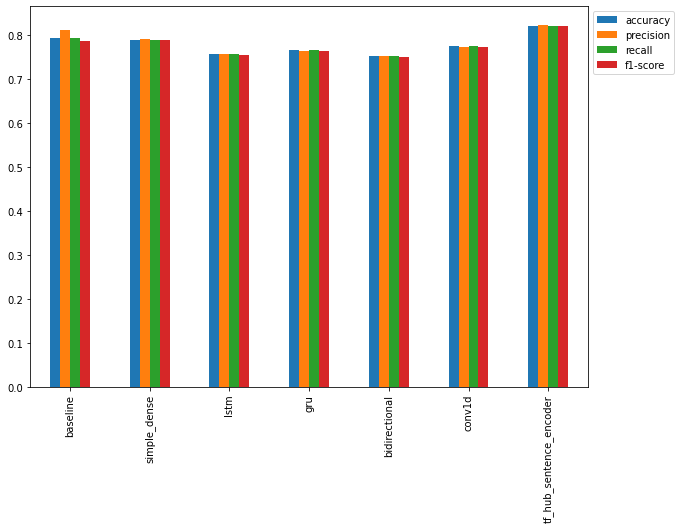

In [78]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

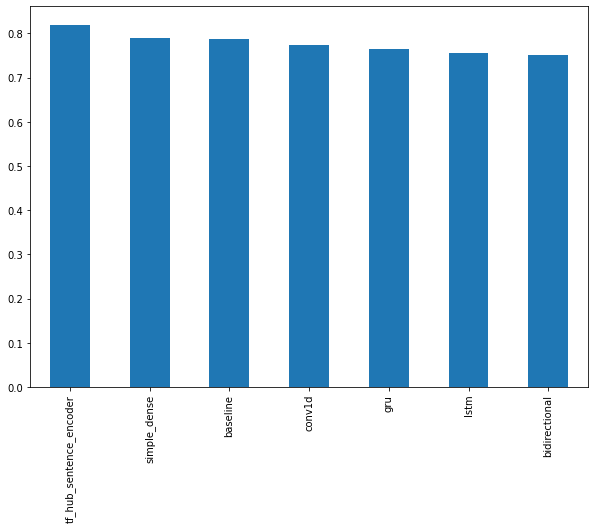

In [79]:
# Sort model results by f1-score
all_model_results.sort_values("f1-score",ascending=False)["f1-score"].plot(kind="bar",figsize=(10,7));

## Combining our models (model ensembling/stacking)

* Averaging - Take the output prediction probabilities of each model for each sample, combine them and then average them.
* Majority vote (mode) - Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.
* Model stacking - Take the outputs of each of your chosen models and use them as inputs to another model.

In [80]:
import numpy as np

In [81]:
# Get mean pred probs for 3 models (baseline + simple_dense + tf_hub use)
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences),axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_6_pred_probs) + tf.squeeze(model_1_pred_probs) 
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [82]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels,combined_preds)
ensemble_results

{'accuracy': 80.70866141732283,
 'precision': 0.8068810169147006,
 'recall': 0.8070866141732284,
 'f1-score': 0.8069152667545839}

In [83]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [84]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [85]:
all_model_results

,accuracy,precision,recall,f1-score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.790026,0.790403,0.790026,0.788968
lstm,0.757218,0.757329,0.757218,0.755828
gru,0.765092,0.764701,0.765092,0.764672
bidirectional,0.751969,0.751581,0.751969,0.751082
conv1d,0.774278,0.774059,0.774278,0.773515
tf_hub_sentence_encoder,0.821522,0.824132,0.821522,0.820003
ensemble_results,0.807087,0.806881,0.807087,0.806915


In [86]:
model_6.save("model_6.h5")

In [87]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",custom_objects={"KerasLayer":hub.KerasLayer})

In [88]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.5891 - accuracy: 0.8215


[0.589073121547699, 0.8215222954750061]

## Finding the most wrong examples

In [89]:
val_df = pd.DataFrame({
    "text":val_sentences,
    "target":val_labels,
    "pred":model_6_preds,
    "pred_prob":tf.squeeze(model_6_pred_probs)
})

In [90]:
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.046320
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.756744
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.999993
3,@camilacabello97 Internally and externally scr...,1,0.0,0.144298
4,Radiation emergency #preparedness starts with ...,1,1.0,0.660005


In [91]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"]!=val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
628,@noah_anyname That's where the concentration c...,0,1.0,0.998285
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.997804
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.997498
741,#helpme what do I do? My friend has been ticke...,0,1.0,0.991713
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.991532
359,the windstorm blew thru my open window and now...,0,1.0,0.984691
645,Love is the weapon for this wounded generation...,0,1.0,0.983557
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.978337
718,Haley Lu Richardson Fights for Water in The La...,0,1.0,0.971197
397,The #tubestrike is because TFL workers may hav...,0,1.0,0.957511


In [92]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
    _,text,target,pred,prob = row
    print(f"Target: {target},pred: {int(pred)},prob: {prob}")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: 0,pred: 1,prob: 0.9982849955558777
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

---

Target: 0,pred: 1,prob: 0.9978042244911194
Text:
Air Group is here to the rescue! We have 24/7 Emergency Service! Learn more about it here - http://t.co/9lyx7zMtHE http://t.co/5PbC96rTMJ

---

Target: 0,pred: 1,prob: 0.9974978566169739
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

---

Target: 0,pred: 1,prob: 0.991713285446167
Text:
#helpme what do I do? My friend has been ticketed by Police in Wayne County Michigan into never- sending poverty cycle. How do I help him?

---

Target: 0,pred: 1,prob: 0.9915321469306946
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

---

Target: 0,pred: 1,prob: 0.9846910834312439
Text:
the windstorm blew thru my open wind

In [93]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.0031338303815573454
Text:
So I pick myself off the ground and swam before I drowned. Hit the bottom so hard I bounced twice suffice this time around is different.

----

Target: 1, Pred: 0, Prob: 0.0023509101010859013
Text:
Two hours to get to a client meeting. Whirlwind of emotions with this #tubestrike

----

Target: 1, Pred: 0, Prob: 0.0017603380838409066
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.0011323143262416124
Text:
Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP

----

Target: 1, Pred: 0, Prob: 0.0010191143956035376
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0, Prob: 0.0008274847641587257
Text:
Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube

----

Target: 1, Pred: 0, Prob: 0.00074202154064551
Text:
@GodOf_Mischief_ -of Loki's daggers she pulled it out and jammed it int

## Making predictions on the test dataset

In [94]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
    pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
    pred = tf.round(pred_prob)
    print(f"Pred: {int(pred)}, Prob: {pred_prob}")
    print(f"Text:\n{test_sample}\n")
    print("----\n")

Pred: 1, Prob: 0.9512537121772766
Text:
RT Hamosh84: This how the #Saudi is coming home from #Yemen in body bags. For what? #Saudi Kingdom ego? You're looÛ_ http://t.co/LJlKWGXgjY

----

Pred: 1, Prob: 0.9974650144577026
Text:
2 NNW Hana [Maui Co HI] COUNTY OFFICIAL reports COASTAL FLOOD at 5 Aug 10:00 AM HST -- WAIANAPANAPA STATE PARK CLOSED DUE TO LARGE SURF. Û_

----

Pred: 0, Prob: 0.05851401761174202
Text:
Police siren sound effect 1 via Play Tube Fre http://t.co/BLWnTMyQmQ

----

Pred: 0, Prob: 0.014663619920611382
Text:
When Rescuers Found Him He ... http://t.co/sTDCdHQxJX

----

Pred: 1, Prob: 0.9217574000358582
Text:
I was there to see @JimmieJohnson wreck in 2000 in person. My first thought was he's leaving on a stretcher!

----

Pred: 0, Prob: 8.894214261090383e-05
Text:
Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/4dGpBAiVL7

----

Pred: 0, Prob: 0.17099443078041077
Text:
Permutable site conspiracy up-to-the-minute upheaval: QWkD

----

Pred: 0, Prob: 0.

In [95]:
test_sentences = test_df["text"].to_list()
test_pred_probs = model_6.predict(test_sentences)
test_preds = tf.round(tf.squeeze(test_pred_probs))
sample_df["target"] = [int (x) for x in test_preds]
sample_df.to_csv('submission.csv', index=False)
sample_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [96]:
test_pred_probs_model1 = model_1.predict(test_sentences)

In [97]:
baseline_pred_probs = np.max(model_0.predict_proba(test_sentences),axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(test_pred_probs) + tf.squeeze(test_pred_probs_model1) 
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0.], dtype=float32)>

In [98]:
sample_df["target"] = [int (x) for x in combined_preds]
sample_df.to_csv('submission2.csv', index=False)
sample_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
